# Predicting Athlete Injury Risk Using Performance and Training Data

#### Jordan Hartman
#### 2/21/2026
#### Predictive Analytics - Injury Prevention

## Business Understanding

#### Athletic programs face significant challenges related to injury prevention. Injuries lead to missed practices and games, extended rehabilitation periods, increased medical costs, and reduced team performance. 



#### The objective of this project is to analyze athlete performance and training data to identify key factors associated with injury occurrence and develop a predictive model that estimates injury risk.

#### By identifying high-risk athletes early, coaching and sports medicine staff can make informed decisions regarding workload adjustments, recovery protocols, and preventative interventions.

## Key Business Question:

#### Can we accurately predict injury occurrence based on measurable training and performance variables?

## Analytic Approach

#### Athletic programs face challenges related to unpredictable injury risk during training and competition. Injuries result in missed practices, reduced performance, and extended rehabilitation time. The objective of this project is to develop a predictive model using athlete performance and training data to estimate injury probability and identify key risk factors. The results of this analysis can support data-driven injury prevention and workload management decisions.

#### Because injury cases represent a small proportion of the dataset (~7%), this is an imbalanced classification problem. Therefore, model evaluation will emphasize recall and ROC-AUC rather than accuracy alone.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import zipfile

In [21]:
data_path = Path("data")
data_path.mkdir(exist_ok=True)

data_path

PosixPath('data')

In [23]:
zip_path = Path("Athlete Injury and Performance Dataset.zip")  # adjust name if needed

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(data_path)

list(data_path.glob("*"))

[PosixPath('data/collegiate_athlete_injury_dataset.csv')]

In [25]:
csv_path = data_path / "collegiate_athlete_injury_dataset.csv"

df = pd.read_csv(csv_path)

df.shape

(200, 17)

In [27]:
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [31]:
df['Injury_Indicator'].value_counts()

Injury_Indicator
0    186
1     14
Name: count, dtype: int64

In [34]:
df.describe()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.170000,180.805000,77.475000,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,2.002787,11.529598,12.440789,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,18.000000,160.000000,55.000000,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,19.000000,171.000000,67.000000,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,21.000000,182.500000,77.500000,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,23.000000,191.000000,89.000000,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000
max,24.000000,199.000000,99.000000,9.00000,19.000000,3.000000,4.000000,3.000000,9.000000,99.000000,99.000000,100.000000,100.000000,1.000000


In [36]:
df.corr(numeric_only=True)

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
Age,1.000000,-0.015967,-0.022215,0.046616,-0.082926,-0.060282,0.073681,0.002610,0.062439,0.007918,-0.059180,0.097219,-0.021586,0.006082
Height_cm,-0.015967,1.000000,0.029832,-0.060676,0.055896,0.098545,0.008309,0.049084,-0.027085,0.012898,-0.066057,-0.006371,-0.053553,0.021691
Weight_kg,-0.022215,0.029832,1.000000,-0.040565,-0.118833,-0.034643,0.091795,-0.012667,-0.042655,-0.084063,-0.062154,0.005572,-0.012700,0.066876
Training_Intensity,0.046616,-0.060676,-0.040565,1.000000,-0.020210,-0.076062,-0.118560,0.082499,-0.004178,-0.130479,0.059598,-0.052542,0.361971,0.098502
Training_Hours_Per_Week,-0.082926,0.055896,-0.118833,-0.020210,1.000000,0.121332,0.025239,-0.256886,0.005765,0.077861,-0.013388,-0.511471,0.208818,0.130958
Recovery_Days_Per_Week,-0.060282,0.098545,-0.034643,-0.076062,0.121332,1.000000,0.049112,-0.053634,-0.036869,-0.025226,-0.013782,0.525141,-0.303318,-0.261309
Match_Count_Per_Week,0.073681,0.008309,0.091795,-0.118560,0.025239,0.049112,1.000000,-0.069632,-0.030320,0.068142,-0.011008,0.019891,-0.033123,-0.023648
Rest_Between_Events_Days,0.002610,0.049084,-0.012667,0.082499,-0.256886,-0.053634,-0.069632,1.000000,-0.065807,-0.094817,0.086560,0.111465,-0.053774,-0.039670
Fatigue_Score,0.062439,-0.027085,-0.042655,-0.004178,0.005765,-0.036869,-0.030320,-0.065807,1.000000,-0.051428,0.080237,-0.113004,0.649706,0.292475
Performance_Score,0.007918,0.012898,-0.084063,-0.130479,0.077861,-0.025226,0.068142,-0.094817,-0.051428,1.000000,-0.023421,-0.086528,-0.026019,0.023475


### Correlation Insight

#### Preliminary correlation analysis indicates that ACL_Risk_Score, Load_Balance_Score, and Fatigue_Score demonstrate the strongest relationships with injury occurrence.

#### Higher fatigue scores and ACL risk scores are positively associated with injury, while higher load balance scores and increased recovery days are negatively associated with injury.

#### These findings suggest that workload balance and fatigue management may play critical roles in injury prevention strategies.

#### However, further investigation is required to ensure that risk-related scores do not introduce data leakage into predictive modeling.

In [43]:
df = df.drop(columns=["Athlete_ID"])

df.head()

,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


In [45]:
df_encoded = pd.get_dummies(df, columns=["Gender", "Position"], drop_first=True)

df_encoded.head()

,Age,Height_cm,Weight_kg,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator,Gender_Male,Position_Forward,Position_Guard
0,24,195,99,2,13,2,3,1,1,99,58,100,4,0,False,False,False
1,21,192,65,8,14,1,3,1,4,55,63,83,73,0,True,True,False
2,22,163,83,8,8,2,1,3,6,58,62,100,62,0,True,False,True
3,24,192,90,1,13,1,1,1,7,82,74,78,51,0,False,False,True
4,20,173,79,3,9,1,2,1,2,90,51,83,49,0,False,False,False


In [47]:
df_encoded.shape

(200, 17)

In [53]:
X = df_encoded.drop(columns=["Injury_Indicator"])
y = df_encoded["Injury_Indicator"]

X.shape, y.shape

((200, 16), (200,))

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(), y_test.value_counts()

(Injury_Indicator
 0    149
 1     11
 Name: count, dtype: int64,
 Injury_Indicator
 0    37
 1     3
 Name: count, dtype: int64)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter=1000)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [61]:
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

[[34  3]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.50      1.00      0.67         3

    accuracy                           0.93        40
   macro avg       0.75      0.96      0.81        40
weighted avg       0.96      0.93      0.94        40

ROC-AUC: 0.9819819819819819


In [65]:
X_no_acl = X.drop(columns=["ACL_Risk_Score"])

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_acl, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

log_model2 = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model2.fit(X_train2_scaled, y_train2)

y_pred2 = log_model2.predict(X_test2_scaled)
y_prob2 = log_model2.predict_proba(X_test2_scaled)[:, 1]

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))
print("ROC-AUC:", roc_auc_score(y_test2, y_prob2))

[[36  1]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.50      0.33      0.40         3

    accuracy                           0.93        40
   macro avg       0.72      0.65      0.68        40
weighted avg       0.91      0.93      0.92        40

ROC-AUC: 0.927927927927928


In [67]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
})

feature_importance.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
12,ACL_Risk_Score,2.628683
8,Fatigue_Score,0.995305
3,Training_Intensity,0.640164
14,Position_Forward,0.605487
15,Position_Guard,0.516625
1,Height_cm,0.391391
2,Weight_kg,0.274204
5,Recovery_Days_Per_Week,0.250213
6,Match_Count_Per_Week,0.166311
0,Age,-0.023618


## Feature Importance Interpretation

#### Logistic regression coefficients indicate that ACL_Risk_Score, Fatigue_Score, and Training_Intensity are among the strongest positive predictors of injury. Conversely, Load_Balance_Score demonstrates a strong negative relationship, suggesting that balanced workload distribution may serve as a protective factor.

#### These findings align with sports medicine principles, where fatigue accumulation and workload imbalance are commonly associated with increased injury risk.

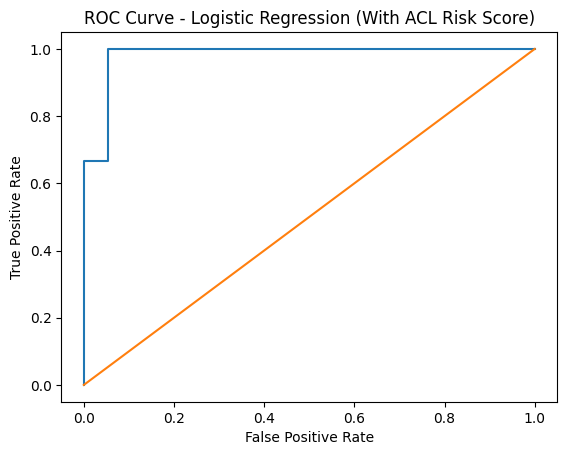

In [72]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (With ACL Risk Score)")
plt.show()

## Limitations

#### The dataset contains only 200 observations, with 14 injury cases, resulting in class imbalance and limited injury representation.

#### Small test set injury count (n=3) makes recall metrics unstable.

#### The origin of ACL_Risk_Score must be verified to ensure it does not introduce data leakage.

#### The dataset appears cross-sectional and does not include time-series workload accumulation.

#### External validation on a separate dataset would be required before real-world deployment.

## Practical Application & Deployment Considerations

#### If deployed in an athletic program, this model could:

##### Generate injury risk probabilities for athletes weekly.

##### Flag athletes above a chosen probability threshold for review.

##### Support workload adjustment decisions.

##### Complement clinical screening and monitoring tools.

##### Threshold selection should prioritize recall to minimize missed injury cases while balancing false positives.